## **Pre-Process:**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
path_file='/content/drive/Shareddrives/Embible/Data/Results/'
file_names=['baseline1','baseline2','ensemble']
lst_dataframes=[]
lst_dataframes_baseline2=[]
c=0
for j in file_names:
  if j == 'baseline2' or j== 'ensemble':
     lst_dataframes.append(pd.read_csv(path_file+j+'-MRR_WORD'+'.csv'))
     lst_dataframes.append(pd.read_csv(path_file+j+'-MRR_CHAR'+'.csv'))
  else:
      lst_dataframes.append(pd.read_csv(path_file+j+'-MRR_WORD'+'.csv'))
      


In [9]:
def change_masking_values(lst_dataframes):
  new_df=[]
  for i in lst_dataframes:
    i['file'] = i['file'].str.rsplit('/', n=1, expand=True)[1]
    i['file'] = i['file'].str.replace('json', '')
    lst_maskes=[]
    
    for masking in i['file']:
        if '_5_no_niqqud_new.' in masking :
          lst_maskes.append('5% Mask')
        if '_15_no_niqqud_new.' in masking:
          lst_maskes.append('15% Mask')
        if '_25_no_niqqud_new.' in masking :
          lst_maskes.append('25% Mask')
        if '_30_no_niqqud_new.' in masking :
          lst_maskes.append('30% Mask')
    i['file']=lst_maskes

    new_df.append(i)
  
  return new_df

In [10]:
new_df=change_masking_values(lst_dataframes)


In [21]:
dfs1 = [new_df[1],new_df[3]]
merged_df_baseline2_ensemble_words = pd.concat(dfs1, axis=0, ignore_index=True)

dfs2 = [new_df[2],new_df[4]]
merged_df_baseline2_ensemble_chars = pd.concat(dfs2, axis=0, ignore_index=True)

dfs3 = [new_df[0], new_df[4]]
merged_df_baseline1_ensemble_words = pd.concat(dfs3, axis=0, ignore_index=True)

## **Baseline 2:**

In [24]:
lst_baseline2_ensemble=[merged_df_baseline2_ensemble_words,merged_df_baseline2_ensemble_chars]
lst_merges_by_metric=[]
for df in lst_baseline2_ensemble:
  df=df.loc[df['model'].isin(['Embible/AlephBertGimmel-50-epochs','Embible/mBert-50-epochs','Embible/distilBert-50-epochs','EnsembleV2'])]
  lst_merges_by_metric.append(df)
  
unique_values=[]
for name in list(lst_merges_by_metric[0].model.unique()):
  if name=='EnsembleV2':
    unique_values.append(name)
  else:
    unique_values.append(name.split('/')[1].split('-')[0])
    unique_values[0]='AlephBertG'

In [50]:
def plot_Compare_result_ensemble_Baseline2(lst_merges_by_metric,colors1,unique_values,model_name):
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,12))
  flag=False
  index=0
  for i,eval in enumerate(['Word','Char']):   
      sns.barplot(x='file', y='MRR Res' ,data=lst_merges_by_metric[i],hue='model',palette=colors1, ax=axs[i])
      axs[i].set_title('MRR '+eval, fontsize=18, fontweight="bold")
      axs[i].set_xlabel("Percentage Of Masking Dataset", fontsize=16)
      axs[i].set_ylabel("MRR", fontsize=16)
      legend_elements2 = [plt.Line2D([0], [0],marker='o', color='w', label=unique_values[0], markerfacecolor=colors1[0], markersize=12),
                    plt.Line2D([0], [0], marker='o', color='w', label=unique_values[1], markerfacecolor=colors1[1], markersize=12),
                    plt.Line2D([0], [0],marker='o', color='w', label=unique_values[2], markerfacecolor=colors1[2], markersize=12),
                    plt.Line2D([0], [0],marker='o', color='w', label=unique_values[3], markerfacecolor=colors1[3], markersize=12)]        
      axs[i].legend(handles=legend_elements2, loc='best',handlelength=0.05, borderpad=0.5,labelspacing=0.5)


  fig.suptitle(model_name, fontsize=20)
  
  fig.savefig("baseline2results.png")

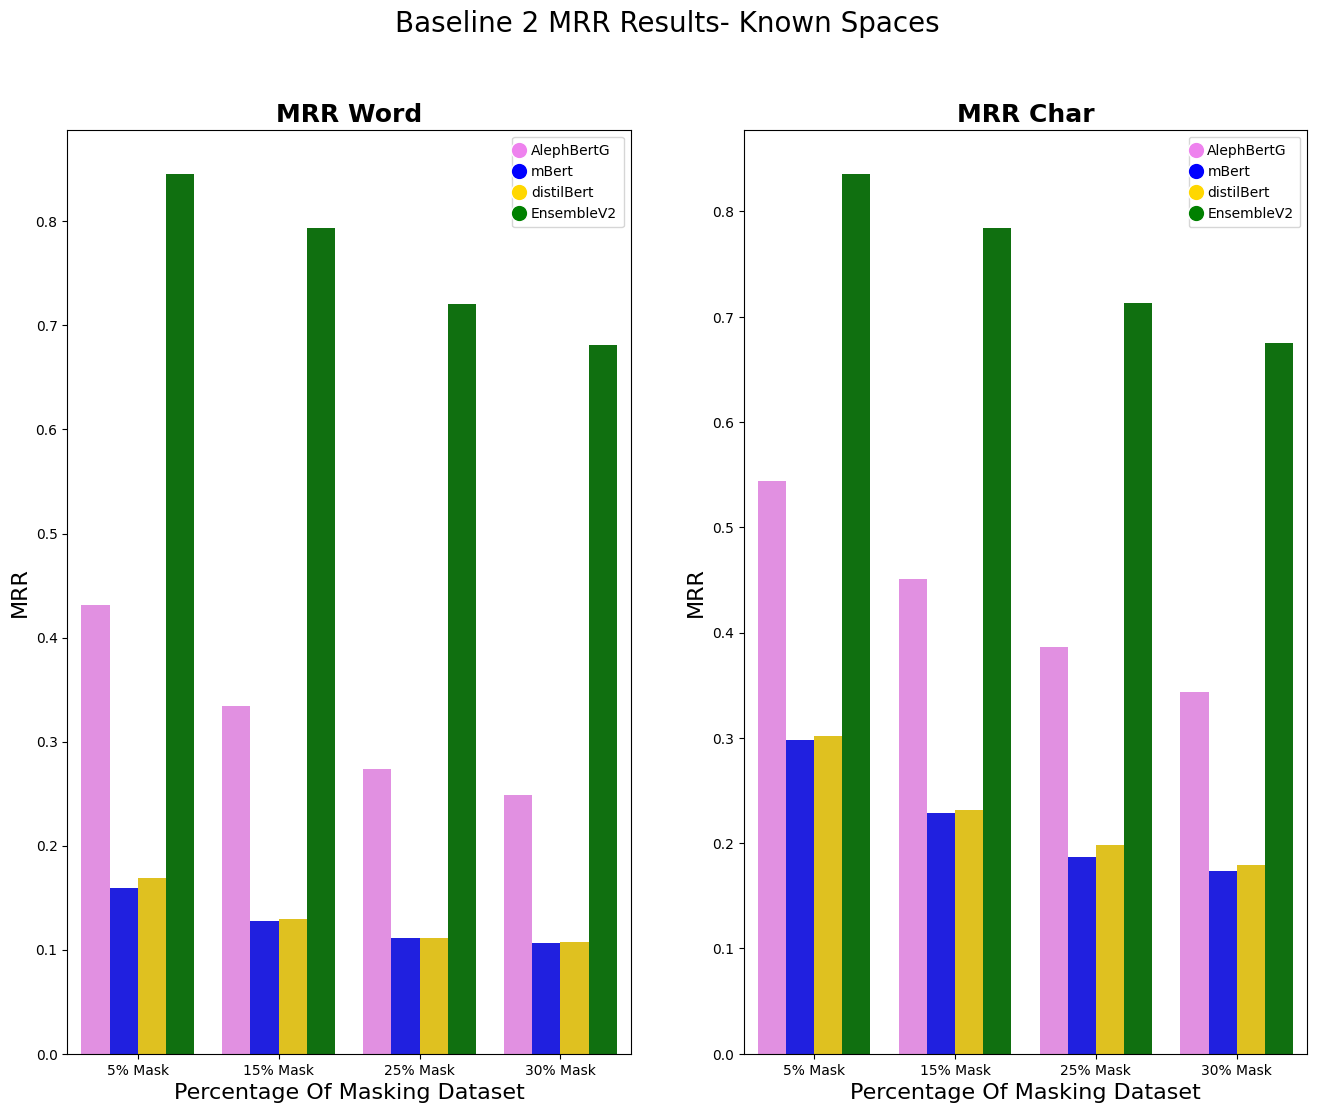

In [51]:
plot_Compare_result_ensemble_Baseline2(lst_merges_by_metric,["violet", "blue","gold",'green'],unique_values,'Baseline 2 MRR Results- Known Spaces')

## **Baeline 1:**

In [36]:
df_baseline1_ensemble=merged_df_baseline1_ensemble_words.loc[merged_df_baseline1_ensemble_words['model'].isin(['Embible/AlephBertGimmel-50-epochs','Embible/mBert-50-epochs','Embible/distilBert-50-epochs','EnsembleV2'])]


In [48]:
def plot_Compare_result_ensemble_baseline1(lst_merges_by_metric,colors1,unique_values,model_name):
  plt.subplots(figsize=(12,8))
  ax=sns.barplot(x='file', y='MRR Res' ,data=lst_merges_by_metric,hue='model',palette=colors1)
  ax.set_title('MRR Word', fontsize=18, fontweight="bold")
  ax.set_xlabel("Percentage Of Masking Dataset", fontsize=16)
  ax.set_ylabel("MRR", fontsize=16)
  legend_elements2 = [plt.Line2D([0], [0],marker='o', color='w', label=unique_values[0], markerfacecolor=colors1[0], markersize=12),
                plt.Line2D([0], [0], marker='o', color='w', label=unique_values[1], markerfacecolor=colors1[1], markersize=12),
                plt.Line2D([0], [0],marker='o', color='w', label=unique_values[2], markerfacecolor=colors1[2], markersize=12),
                plt.Line2D([0], [0],marker='o', color='w', label=unique_values[3], markerfacecolor=colors1[3], markersize=12)]        
  ax.legend(handles=legend_elements2, loc='best',handlelength=0.05, borderpad=0.5,labelspacing=0.5)


  plt.suptitle(model_name, fontsize=20)
  plt.savefig("baseline1results_MRR.png")


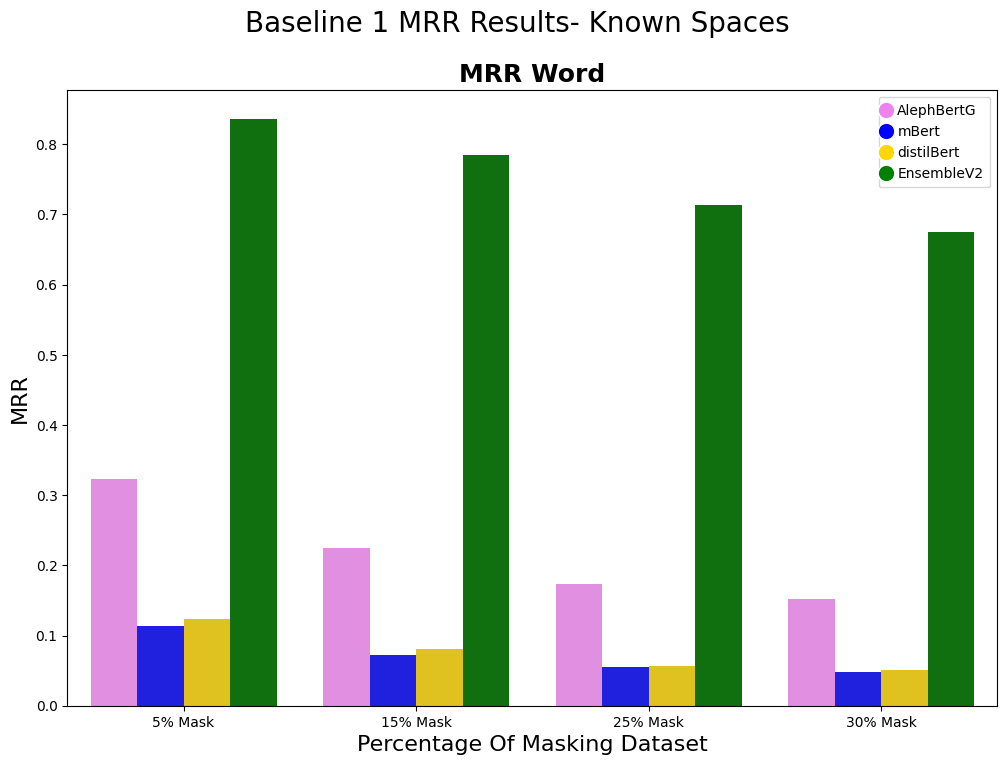

In [49]:
plot_Compare_result_ensemble_baseline1(df_baseline1_ensemble,["violet", "blue","gold",'green'],unique_values,'Baseline 1 MRR Results- Known Spaces')